epoch=0, loss=3.31545, accuracy=17.24%
epoch=100, loss=2.64295, accuracy=55.17%
epoch=200, loss=1.53710, accuracy=75.86%
epoch=300, loss=0.93825, accuracy=93.10%
epoch=400, loss=0.51597, accuracy=93.10%
epoch=500, loss=0.32622, accuracy=93.10%
epoch=600, loss=0.35218, accuracy=96.55%
epoch=700, loss=0.33404, accuracy=93.10%
epoch=800, loss=0.32731, accuracy=93.10%
epoch=900, loss=0.20322, accuracy=93.10%
epoch=1000, loss=0.28349, accuracy=93.10%
epoch=1100, loss=0.19108, accuracy=93.10%
epoch=1200, loss=0.16461, accuracy=93.10%
epoch=1300, loss=0.15353, accuracy=93.10%
epoch=1400, loss=0.16692, accuracy=93.10%
epoch=1500, loss=0.20225, accuracy=93.10%
epoch=1600, loss=0.14991, accuracy=89.66%
epoch=1700, loss=0.15891, accuracy=89.66%
epoch=1800, loss=0.18068, accuracy=89.66%
epoch=1900, loss=0.15801, accuracy=93.10%
epoch=2000, loss=0.20938, accuracy=93.10%
epoch=2100, loss=0.28965, accuracy=93.10%
epoch=2200, loss=0.18610, accuracy=89.66%
epoch=2300, loss=0.18555, accuracy=93.10%
epoc

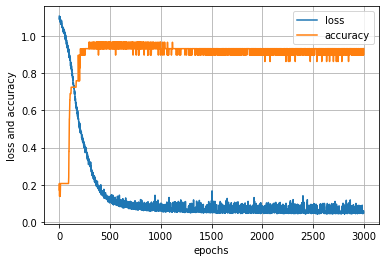

In [4]:
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch
import pandas as pd
import matplotlib.pyplot as plt

torch.manual_seed(777)

dataset = pd.read_csv('iris.csv').to_numpy()
x_tensor = torch.Tensor(dataset[:,0:-1])
y_tensor = torch.LongTensor(dataset[:,-1])
iris = TensorDataset(x_tensor, y_tensor)

test_set_size = int(len(iris)*0.2)
train_set_size = len(iris) - test_set_size

train_set, test_set = random_split(iris, 
                                   [train_set_size, 
                                    test_set_size])

BATSIZE = 50
train_loader = DataLoader(dataset=train_set,
                          batch_size=BATSIZE,
                          shuffle=True)
test_loader = DataLoader(dataset=test_set,
                          batch_size=test_set_size,
                          shuffle=False)

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(4, 64)
        self.fc2 = torch.nn.Linear(64, 32)
        self.fc3 = torch.nn.Linear(32, 16)
        self.fc4 = torch.nn.Linear(16, 3)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        z = self.fc4(x)
        
        return z

net = Net()
cel = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.005)

loss_lst = []
acc_lst = []
EPOCH = 3000
for epoch in range(EPOCH):
    l_sum = 0
    net.train()
    for data in train_loader:
        x, y = data
        z = net(x)
        loss = cel(z, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        l_sum += loss.item()
    loss_lst.append(l_sum/len(train_loader))

    net.eval()
    correct = 0
    with torch.no_grad():
        for x, y in test_loader:
            y_hat = net(x)
            y_hat = torch.argmax(y_hat,dim=1)
            correct += torch.sum(y==y_hat)
        
    accuracy = correct / test_set_size
    acc_lst.append(accuracy)   

    if epoch % 100 == 0:
        print(f'epoch={epoch}, loss={l_sum:0.5f}, accuracy={accuracy*100:0.2f}%')


plt.plot(range(EPOCH), loss_lst)
plt.plot(range(EPOCH), acc_lst)
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('loss and accuracy')
plt.legend(('loss', 'accuracy'))
plt.show()